## Pendahuluan

**Studi: Game Paling Potensial untuk Dijual**

Saat ini kita mempunyai toko online `"Ice"` yang menjual video game dari seluruh dunia. Dan kita mempunyai data terkait dengan  ulasan pengguna dan ahli game, genre, platform (misalnya, Xbox atau PlayStation), dan data historis penjualan game tersedia dari open source. Saat ini kita perlu mengidentifikasi pola-pola yang menentukan apakah suatu game bisa dikatakan berhasil atau tidak. Dengan begitu, kita bisa menemukan game yang paling potensial dan merencanakan kampanye iklannya.

Dan saat ini kita mempunyai data hingga `Desember 2016`, kita akan menggunakan data ini untuk menganalisa penjualan satu tahun ke depan yaitu tahun `2017`.

Dataset yang kita punya ini juga memuat singkatan `ESRB`. ESRB merupakan singkatan dari `Entertainment Software Rating Board`, yaitu sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.


### Tujuan Proyek

1. Mengetahui game apa yang paling potensial untuk dijual.

### Hipotesis

1. Rata-rata rating pengguna platform `Xbox One dan PC` adalah sama.
2. Rata-rata rating pengguna genre `Action dan Sports` berbeda.

## Konten <a id='back'></a>

* [1.Pendahuluan](#intro)
    * [1.1 Tujuan Proyek](#cont_1)
    * [1.2 Hipotesis](#cont_2)
* [2. Konten](#cont_3)
    * [2.1 Inisialisasi Data](#cont_4)
    * [2.2 Memuat Data](#cont_8)
    * [2.3 Mempersiapkan Data](#cont_14)
    * [2.4 Analisa Data](#cont_15)
      * [2.4.1 Cek Penjualan Game pada masing-masing platform](#cont_15)
      * [2.4.2 Cek penjualan platform terbanyak Periode 1990 - 2016](#cont_15)
    * [2.5 Box Plot Penjualan Global Platform PC dan X360](#cont_20)
    * [2.6 Perbandingan Game dengan Platform Lain](#cont_22) 
    * [2.7 Cek Distribusi Genre Game](#cont_23)
    * [2.8  Pemrofilan Pengguna untuk Masing - Masing Wilayah](#cont_24)
      * [2.8.1 Cek 5 Platform Teratas di Masing - Masing Wilayah](#cont_25)
      * [2.8.2 Cek 5 genre teratas di Masing - Masing Wilayah](#cont_26)
      * [2.8.3 Cek Pengaruh Rating ESRB dengan Penjualan di Masing - Masing Wilayah](#cont_26)
    * [2.9 Menguji Hipotesis](#cont_26)
      * [2.9.1 Pengujian Hipotesis 1: Rata-rata Rating Pengguna Platform Xbox One dan PC adalah sama](#cont_26)
      * [2.9.2 Pengujian Hipotesis 2: Rata-rata Rating Pengguna Genre Action dan Sports berbeda.](#cont_26)
    * [2.10 Kesimpulan Umum](#cont_26)
    
Pendahuluan
Konten
Tahap 1. Mengumpulkan Data Menggunakan SQL
1.1 Web Scraping
1.2 Menghitung dan Mengurutkan Trip Berdasarkan Nama Perusahaan
1.3 Menghitung Jumlah Trip Berdasarkan Nama Perusahaan yang Menggunakan kata Yellow atau Blue
1.4 Menghitung Jumlah Trip untuk Nama Perusahaan Flash Cab dan Taxi Affiliation Services
1.5 Mengumpulkan Hasil Akhir Rekaman Cuaca
Tahap 2. Mempersiapkan Datasets
2.1 Insialisasi Library
2.2 Mempersiapkan Dataset company_name
2.3 Mempersiapkan Dataset dropoff_location
2.4 Mempersiapkan Dataset weather
Tahap 3. Memperbaiki Datasets
3.1 Mengecek Duplikat pada Datasets
3.2 Mengecek Nilai yang Hilang pada Datasets
3.3 Memperbaiki Kualitas Data pada Dataset company_name
3.4 Memperbaiki Kualitas Data pada Dataset dropoff_location
3.5 Memperbaiki Kualitas Data pada Dataset weather
Tahap 4. Analisis Data Eksploratif (EDA)
4.1 Analisis Dataset Perusahaan Taksi
4.2 Analisis Dataset Lokasi Dropoff
Tahap 5. Pengujian Hipotesis
Tahap 6. Kesimpulan Umum


### Inisialisasi Data

Pada tahap awal mari kita import library beberpa library yaitu `pandas`, `numpy`, `matplotlib`, `seaborn`, `math`, dan `scipy`.

In [2]:
# Muat semua library

import pandas as pd # memproses dataframe
import numpy as np # memproses statistik deskriptif
import matplotlib.pyplot as plt # memvisualisasikan data
import seaborn as sns # memvisualisasikan data
import math as mt # menambahkan fungsi matematika
from scipy import stats as st # memproses hipotesis

### Memuat Data

Mari kita muat datanya.

In [3]:
# muat data
game = pd.read_csv('/datasets/games.csv')

### Mempersiapkan Data


In [4]:
# melihat sampel data
game.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12710,Aquarium by DS,DS,2008.0,Simulation,0.05,0.00,0.00,0.00,NaN,tbd,NaN
13179,Sengoku Basara 4: Sumeragi,PS4,2015.0,Action,0.00,0.00,0.05,0.00,NaN,NaN,NaN
971,Sonic Advance 2,GBA,2002.0,Platform,0.93,0.59,0.21,0.07,83.0,8.3,E
1333,NCAA Football 2003,PS2,2002.0,Sports,1.16,0.08,0.00,0.19,91.0,8.6,E
1501,Pitfall II: Lost Caverns,2600,1983.0,Platform,1.22,0.07,0.00,0.02,NaN,NaN,NaN


Karena nama kolom, huruf besar dan kecil, kita akan rubah menjadi huruf kecil semua.

In [5]:
#ubah nama kolom menjadi huruf kecil semua
game.columns = game.columns.str.lower()

# Cek sampel data
game.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16140,Dead Rising,XOne,2016.0,Action,0.01,0.00,0.00,0.00,NaN,8.8,M
8389,Clock Tower II: The Struggle Within,PS,1998.0,Adventure,0.02,0.01,0.12,0.01,49.0,5.7,M
4214,Football Manager 2015,PC,2014.0,Simulation,0.00,0.44,0.00,0.03,80.0,6,NaN
2970,Star Wars: Masters of Teras Kasi,PS,1997.0,Action,0.38,0.26,0.00,0.04,NaN,NaN,NaN
3494,Tales of the Abyss,PS2,2005.0,Role-Playing,0.00,0.00,0.57,0.00,78.0,8.4,T


Dari sampel data terlihat ada beberapa data yang hilang pada kolom `critic_score`, `user_score`, dan `rating`. Mari kita cek data yang hilang lebih lanjut secara persentase.

In [6]:
# Melakukan pengecekan apakah ada nilai yang hilang pada dataset
game_missed = game.isna().sum().to_frame()
game_missed = game_missed.rename(columns={0: 'missing_values'})
game_missed['% of total'] = (game_missed['missing_values'] / game.shape[0]).round(2)
game_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
critic_score,8578,0.51
rating,6766,0.40
user_score,6701,0.40
year_of_release,269,0.02
name,2,0.00
genre,2,0.00
platform,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


Ternyata dari pengecekan data yang hilang, ternyata kita mempunyai nilai yang hilang pada kolom `critic_score`, `rating`, `user_score`, `year_of_release`, `name`, `genre`. Kita akan membiarkan `critic_score` mempunyai nilai yang hilang, karena missing valuenya sangat banyak, dan dapat berakibat merubah distribusi data. Untuk `user_score`, kita akan membiarkan nilai yang hilang, karena missing valuenya sangat banyak, namun, kita akan merubah nilai `tbd` menjadi `nan`.dan untuk `year_of_release` akan kita isi dengan `0`, dan untuk `name`, `genre`, dan `rating` akan kita isi dengan `unknown`.

Untuk `user_score`, kita akan membiarkan nilai yang hilang, namun untuk `tbd` akan kita rubah menjadi `nan`.

In [7]:
# Mengganti nilai "tbd" dalam kolom 'user_score' menjadi NaN
game['user_score'].replace('tbd', np.nan, inplace=True)

Untuk `year_of_release`, kita akan mengisi data yang hilang dengan nilai 0.

In [8]:
# Mengisi nilai yang hilang dengan 0 untuk kolom Year_of_Release
game['year_of_release'].fillna(0, inplace=True)

Untuk `rating`, kita akan mengisi data yang hilang menggunakan `unknown`, untuk mempermudah analisa.

In [9]:
# Mengisi nilai yang hilang dengan unknown untuk kolom rating
game['rating'].fillna('unknown', inplace=True)

Untuk `genre`, kita akan mengisi data yang hilang dengan `unknown`, untuk mempermudah analisa.

In [10]:
# Mengisi nilai yang hilang dengan unknown untuk kolom genre
game['genre'].fillna('unknown', inplace=True)

Untuk `name`, kita akan mengisi data yang hilang dengan `unknown`, untuk mempermudah analisa.

In [11]:
# Mengisi nilai yang hilang dengan unknown untuk kolom name
game['name'].fillna('unknown', inplace=True)

Mari kita cek apakah masih ada data yang hilang.

In [12]:
# cek data yang hilang
# Melakukan pengecekan apakah ada nilai yang hilang pada dataset
game_missed = game.isna().sum().to_frame()
game_missed = game_missed.rename(columns={0: 'missing_values'})
game_missed['% of total'] = (game_missed['missing_values'] / game.shape[0]).round(2)
game_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
user_score,9125,0.55
critic_score,8578,0.51
name,0,0.00
platform,0,0.00
year_of_release,0,0.00
genre,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00


Sekarang nilai yang hilang hanya ada pada kolom `critic_score` dan `user_score`.

In [13]:
#cek sampel data
game.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10478,Momotarou Dentetsu 16,Wii,2007.0,Misc,0.00,0.00,0.10,0.00,NaN,NaN,unknown
10892,Gradius V,PS2,2004.0,Shooter,0.05,0.04,0.00,0.01,82.0,8.5,T
1464,Battlefield: Bad Company,PS3,2008.0,Shooter,0.76,0.35,0.05,0.18,84.0,8.1,T
349,Pro Evolution Soccer 2008,PS2,2007.0,Sports,0.05,0.00,0.64,2.93,82.0,7.9,E
4873,Mobile Suit Gundam: Lost War Chronicles,PS2,2002.0,Shooter,0.00,0.00,0.39,0.00,NaN,NaN,unknown
2842,Kirby: Canvas Curse,DS,2005.0,Platform,0.36,0.00,0.32,0.03,86.0,8.2,E
3662,Tak and the Power of Juju,GBA,2003.0,Platform,0.39,0.15,0.00,0.01,79.0,9.2,E
11791,Futurama,PS2,2003.0,Platform,0.04,0.03,0.00,0.01,59.0,6.6,T
393,FIFA Soccer 2003,PS2,2002.0,Sports,0.46,2.28,0.05,0.61,88.0,6.7,E
6140,Tales of the World: Radiant Mythology 3,PSP,2011.0,Role-Playing,0.00,0.00,0.28,0.00,NaN,NaN,unknown


Sekarang sudah tidak ditemukan data yang hilang, semua data sudah terisi. Kita lanjutkan cek tipe data.

In [14]:
#cek tipe data
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


kita akan merubah tipe data kolom `year_of release`dari float` menjadi `integer`.

In [15]:
#ubah tipe data float ke integer
# Mengubah tipe data kolom 'year_of_release' dari float menjadi integer
game['year_of_release'] = game['year_of_release'].astype(int)

# Cek tipe data setelah perubahan
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [16]:
#cek sampel data
game.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5789,Shin Megami Tensei: Devil Summoner - Soul Hackers,3DS,2012,Role-Playing,0.13,0.02,0.14,0.01,NaN,NaN,unknown
6617,A. IV Evolution: A Ressha de Ikou 4,PS,1994,Strategy,0.00,0.00,0.24,0.02,NaN,NaN,unknown
1078,Sid Meier's Civilization V,PC,2010,Strategy,0.98,0.52,0.00,0.17,90.0,7.9,E10+
13546,TOCA Race Driver 2,XB,2004,Racing,0.03,0.01,0.00,0.00,NaN,8.3,T
5237,Ganbare Goemon 3: Shishi Jyuurokubei no Karaku...,SNES,1994,Platform,0.00,0.00,0.36,0.00,NaN,NaN,unknown


Saat ini data sudah terlihat cukup baik, kita lanjutkan ke langkah analisa selanjutnya yaitu menghitung total penjualan, dengan menambahkan satu kolom lagi yaitu `total_sales`.

In [17]:
# Menghitung total penjualan
game['total_sales'] = game['na_sales'] + game['eu_sales'] + game['jp_sales'] + game['other_sales']

# Cek sampel data
game.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10901,SD Gundam G Generation DS,DS,2005,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,unknown,0.09
11200,Dead or Alive 5,XOne,2015,Fighting,0.05,0.03,0.01,0.01,NaN,NaN,unknown,0.10
8510,Monster Jam,Wii,2007,Racing,0.15,0.00,0.00,0.01,NaN,7.8,E,0.16
1183,Madden NFL 15,XOne,2014,Sports,1.31,0.09,0.00,0.16,80.0,6.4,E,1.56
7680,Shaman King: Spirit of Shamans,PS,2002,Action,0.00,0.00,0.18,0.01,NaN,NaN,unknown,0.19


Kita sudah berhasil menambahkan kolom `total_sales`, sekarang kita lanjutkan ke tahap analisa data.

### Analisa Data

Untuk tahap awal analisa data, kita akan melakukan agregasi data, dimana kita akan menggunakan dataframe, untuk menganalisa, dengan langkah sebagai berikut:

1. Agregasi data menggunakan dataframe dari `name` meliputi pada platform dan tahun berapa game keluar.
2. Menggabungkan data-data ynag sudah dikumpulkan untuk memperoleh game yang terbanyak terjual.

**Cek Rilis Game Pada Setiap Tahun**

Kita akan menganalisa , berapa banyak game yang dirilis pada tahun yang berbeda. 

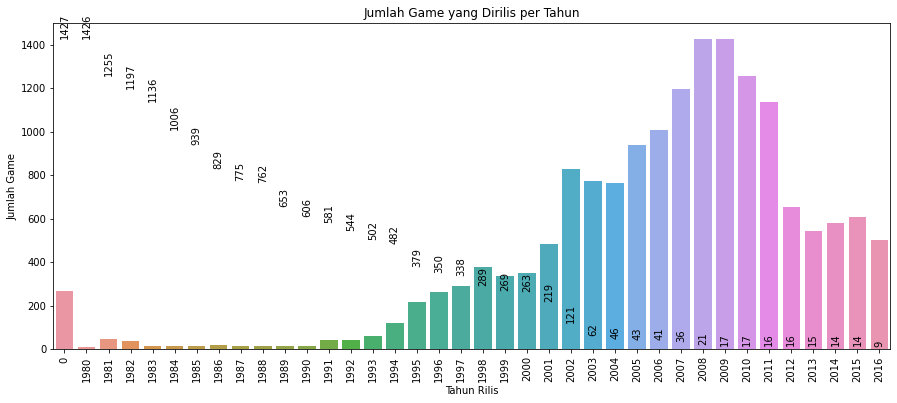

In [18]:
# Menghitung jumlah game yang dirilis pada tahun yang berbeda
game_count_by_year = game['year_of_release'].value_counts().reset_index()
game_count_by_year.columns = ['year', 'game_count']

# Mengurutkan berdasarkan tahun
game_count_by_year = game_count_by_year.sort_values(by='year')

# Plot grafik untuk visualisasi
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='year', y='game_count', data=game_count_by_year)
plt.title('Jumlah Game yang Dirilis per Tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Game')
plt.xticks(rotation=90)

# Menambahkan anotasi di atas bar chart
for index, row in game_count_by_year.iterrows():
    ax.text(index, row['game_count'], str(row['game_count']), ha='center', va='bottom', rotation=90)

plt.show()

Dari grafik terlihat bahwa penjualan game tertinggi adalah pada tahun 2007 sebanyak `1466`.sedangkan untuk data terakhir, tahun 2016 sebanyak `502.`Dari grafik terlihat bahwa penjualan mengalami penurunan terbsar adalah saat tahun `2011` ke `2012`. dan untuk tahun `2013` hingga `2016` mempunyai milai yang hampir sama di range `500`-an.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

#### Cek Penjualan Game pada masing-masing platform

   platform  na_sales  eu_sales  jp_sales  other_sales  total_sales
0      2600     90.60      5.47      0.00         0.91        96.98
1       3DO      0.00      0.00      0.10         0.00         0.10
2       3DS     83.49     61.48    100.67        13.36       259.00
3        DC      5.43      1.69      8.56         0.27        15.95
4        DS    382.40    188.89    175.57        59.26       806.12
5        GB    114.32     47.82     85.12         8.20       255.46
6       GBA    187.54     75.25     47.33         7.73       317.85
7        GC    133.46     38.71     21.58         5.18       198.93
8       GEN     21.05      6.05      2.70         0.97        30.77
9        GG      0.00      0.00      0.04         0.00         0.04
10      N64    139.02     41.06     34.22         4.38       218.68
11      NES    125.94     21.15     98.65         5.31       251.05
12       NG      0.00      0.00      1.44         0.00         1.44
13       PC     94.53    142.44      0.17       

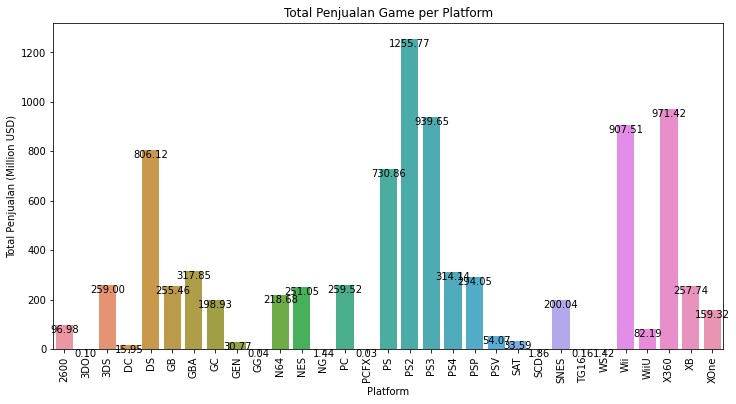

In [19]:
# Menghitung total penjualan per platform
sales_by_platform = game.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].agg('sum').reset_index()

# Menambahkan kolom 'total_sales' yang berisi total penjualan di semua wilayah
sales_by_platform['total_sales'] = sales_by_platform['na_sales'] + sales_by_platform['eu_sales'] + sales_by_platform['jp_sales'] + sales_by_platform['other_sales']

# Menampilkan hasil
print(sales_by_platform)

# Plot grafik untuk visualisasi total penjualan per platform
plt.figure(figsize=(12, 6))
sns.barplot(x='platform', y='total_sales', data=sales_by_platform)
plt.title('Total Penjualan Game per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan (Million USD)')
plt.xticks(rotation=90)

# Menambahkan anotasi di atas batang
for index, row in sales_by_platform.iterrows():
    plt.text(index, row['total_sales'], f"{row['total_sales']:.2f}", ha='center', va='top')

plt.show()

Dari grafik di atas, penjualan game per tahun tertinggi ada di platform `PS2`dimana sebanyak `1255.77`. Kita akan coba kerjakan distribusi datanya untuk platform PS2 per tahun.

    year_of_release  total_sales
0                 0        22.21
1              2000        39.17
2              2001       166.43
3              2002       205.38
4              2003       184.31
5              2004       211.81
6              2005       160.66
7              2006       103.42
8              2007        75.99
9              2008        53.90
10             2009        26.40
11             2010         5.64
12             2011         0.45


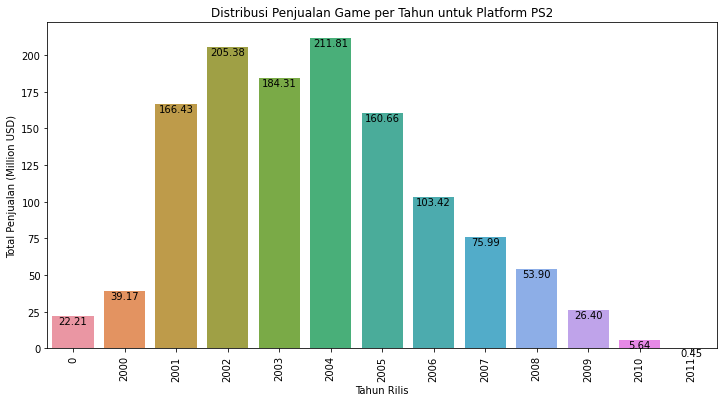

In [20]:
# Filter data hanya untuk platform PS2
ps2_data = game[game['platform'] == 'PS2']

# Menghitung total penjualan per tahun
sales_by_year_ps2 = ps2_data.groupby('year_of_release')['total_sales'].sum().reset_index()

# Menampilkan hasil
print(sales_by_year_ps2)

# Plot grafik distribusi penjualan game per tahun untuk platform PS2
plt.figure(figsize=(12, 6))
sns.barplot(x='year_of_release', y='total_sales', data=sales_by_year_ps2)
plt.title('Distribusi Penjualan Game per Tahun untuk Platform PS2')
plt.xlabel('Tahun Rilis')
plt.ylabel('Total Penjualan (Million USD)')
plt.xticks(rotation=90)

# Menambahkan anotasi di atas batang
for index, row in sales_by_year_ps2.iterrows():
    plt.text(index, row['total_sales'], f"{row['total_sales']:.2f}", ha='center', va='top')

plt.show()

Dari distribusi data `PS2`penjualan terbesar pada tahun `2004`, dengan rentang range penjualan berlangsung dari tahun `2000` hingga `2010`, dan di tahun `2011`, sudah benar benar mengalami penurunan atau bisa kita sebut, sudah tidak ada lagi penjualan. Hal ini menunjukkan bahwa Platform PS2, sudah mulai ditinggalkan, kita akan cari platform yang dulu populer namun sekarang sudah mulai ditinggalkan.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

In [21]:
# Filter data untuk tahun 2014 hingga 2016
filtered_data = game[(game['year_of_release'] >= 2014) & (game['year_of_release'] <= 2016)]

# Kelompokkan data berdasarkan platform dan hitung total penjualan
platform_sales_2014_2016 = filtered_data.groupby('platform')['total_sales'].sum().reset_index()

# Urutkan platform berdasarkan total penjualan dalam urutan menurun
top_10_platforms = platform_sales_2014_2016.sort_values(by='total_sales', ascending=False).head(10)

# Tampilkan 10 platform dengan penjualan terbanyak
print("10 Platform dengan Penjualan Terbanyak dari Tahun 2014 hingga 2016:")
print(top_10_platforms)

10 Platform dengan Penjualan Terbanyak dari Tahun 2014 hingga 2016:
  platform  total_sales
3      PS4       288.15
9     XOne       140.36
0      3DS        86.68
2      PS3        68.18
8     X360        48.22
7     WiiU        42.98
1       PC        27.05
5      PSV        22.40
6      Wii         5.07
4      PSP         0.36


Sekarang kita mempunyai 10 platform dengan penjualan terbanyak dari periode `2014 - 2016`, mari kita cek distribusi data dari stop 10 ini.

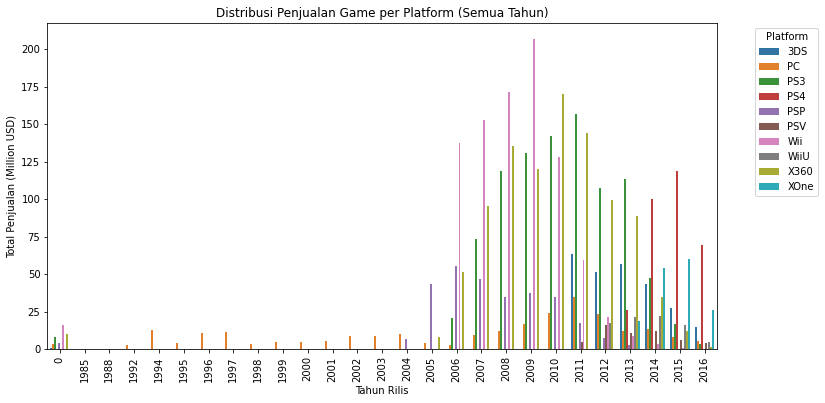

In [22]:
# Filter data hanya untuk 10 platform teratas
filtered_data = game[game['platform'].isin(top_10_platforms['platform'])]

# Kelompokkan data berdasarkan platform dan tahun rilis
platform_sales_distribution = filtered_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Plot grafik distribusi penjualan game per platform
plt.figure(figsize=(12, 6))
sns.barplot(x='year_of_release', y='total_sales', hue='platform', data=platform_sales_distribution)
plt.title('Distribusi Penjualan Game per Platform (Semua Tahun)')
plt.xlabel('Tahun Rilis')
plt.ylabel('Total Penjualan (Million USD)')
plt.xticks(rotation=90)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Dari grafik kita dapat melihat bahwa dari distribusi data menunjukkan tren kenaikan paltform dimulai dari tahun `2006`, dan yang selalu bertahan di setiap masa, adalah `PC`, walaupun jumlah penjualannya tidak banyak, namun selalu ada penjualan. Disusul dengan `X360`yang juga melonjak naik dari tahun `2006 - 2016`. Setelah ini kita akan melihat berapa lama waktu yang dibutuhkan untuk platform baru muncul dan platform lama memudar.

In [23]:
# Ambang penjualan untuk menentukan platform baru
ambang_penjualan = 10  # Misalnya, mengatur ambang penjualan sebesar 10 juta USD

# Filter data hanya untuk platform yang melebihi ambang penjualan
platform_sales = game.groupby('platform')['total_sales'].sum().reset_index()
platform_baru = platform_sales[platform_sales['total_sales'] >= ambang_penjualan]
platform_lama = platform_sales[platform_sales['total_sales'] < ambang_penjualan]

# Tentukan tahun pertama munculnya platform baru, kita gunakan mean untuk tahun pertama muncul, karena data yang hilang kita isi dengan 0.
tahun_pertama_muncul = game[game['platform'].isin(platform_baru['platform'])]['year_of_release'].mean()

# Tentukan tahun terakhir penjualan platform lama
tahun_terakhir_penjualan = game[game['platform'].isin(platform_lama['platform'])]['year_of_release'].max()

# Hitung selisih tahun dalam format jumlah tahun
selisih_tahun = tahun_terakhir_penjualan - tahun_pertama_muncul

print(f"Waktu yang dibutuhkan untuk platform baru muncul dan platform lama memudar adalah {selisih_tahun} tahun.")

Waktu yang dibutuhkan untuk platform baru muncul dan platform lama memudar adalah 26.845900263725753 tahun.


Dari sini kita melihat bahwa waktu yang dibutuhkan untuk platform baru muncul dan platform lama memudar adalah `26.85 Tahun`, dengan asumsi ambang penjualan `10 Juta USD`. Berarti kita akan fokuskan, dengan pergerakan platform dari tahun `1990 - 2016`.

#### Cek penjualan platform terbanyak Periode 1990 - 2016

In [24]:
# Filter data untuk periode 1990 - 2016
filtered_data = game[(game['year_of_release'] >= 1990) & (game['year_of_release'] <= 2016)]

# Kelompokkan data berdasarkan platform
platform_sales = filtered_data.groupby('platform')['total_sales'].sum().reset_index()

# Temukan platform dengan penjualan terbanyak
platform_with_highest_sales = platform_sales[platform_sales['total_sales'] == platform_sales['total_sales'].max()]

print("Platform dengan penjualan terbanyak dari periode 1990 - 2016:")
print(platform_with_highest_sales)

Platform dengan penjualan terbanyak dari periode 1990 - 2016:
   platform  total_sales
15      PS2      1233.56


Dari penjualan periode `1990 - 2016`, terbanyak adalah `PS2`, sesuai dengan penjelasan sebelumnya. Selanjutnya kita cek platform mana yang mengalami pertumbuhan dan penurunan kita rubah range periodenya dari tahun `2000 - 2010`, karena di grafik sebelumnya, penjualan `PS2` hanya berlangsung dari tahun `2000 - 2006`.

In [25]:
# Filter data untuk periode yang ingin dianalisis (misalnya, tahun 2000 hingga 2010)
filtered_data = game[(game['year_of_release'] >= 2000) & (game['year_of_release'] <= 2010)]

# Kelompokkan data berdasarkan platform dan tahun rilis
platform_sales = filtered_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Hitung total penjualan pada awal periode (2000)
total_penjualan_awal = platform_sales[platform_sales['year_of_release'] == 2000].groupby('platform')['total_sales'].sum().reset_index()
total_penjualan_awal.columns = ['platform', 'total_sales_awal']

# Hitung total penjualan pada akhir periode (2010)
total_penjualan_akhir = platform_sales[platform_sales['year_of_release'] == 2010].groupby('platform')['total_sales'].sum().reset_index()
total_penjualan_akhir.columns = ['platform', 'total_sales_akhir']

# Gabungkan data total penjualan awal dan akhir
platform_growth_analysis = pd.merge(total_penjualan_awal, total_penjualan_akhir, on='platform')

# Tentukan platform-platform yang tumbuh (penjualan akhir > penjualan awal)
platform_growth = platform_growth_analysis[platform_growth_analysis['total_sales_akhir'] > platform_growth_analysis['total_sales_awal']]

# Tentukan platform-platform yang menyusut (penjualan akhir < penjualan awal)
platform_decline = platform_growth_analysis[platform_growth_analysis['total_sales_akhir'] < platform_growth_analysis['total_sales_awal']]

print("Platform yang mengalami pertumbuhan selama periode 2000 - 2010:")
print(platform_growth)

print("\nPlatform yang mengalami penyusutan selama periode 2000 - 2010:")
print(platform_decline)

Platform yang mengalami pertumbuhan selama periode 2000 - 2010:
  platform  total_sales_awal  total_sales_akhir
0       PC              4.66              24.28

Platform yang mengalami penyusutan selama periode 2000 - 2010:
  platform  total_sales_awal  total_sales_akhir
1      PS2             39.17               5.64


Dari data di atas, maka kita ketahui, bahwa platform yang mengalami pertumbuhan adalah `PC`, dan untuk yang mengalami penyusutan adalah `PS2`. Maka, kita bisa asumsikan `PC` adalah platform yang menguntungkan. Untuk itu kita akan menambahkan Top 5 dari periode `1990 - 2016`, agar banyak platform yang terfokuskan, sesuai dengan berapa lam waktu platform baru muncul dan platform lama memudar.

In [26]:
# Filter data untuk tahun-tahun terbaru, misalnya tahun 1990-2016
filtered_data = game[(game['year_of_release'] >= 1990) & (game['year_of_release'] <= 2016)]

# Kelompokkan data berdasarkan platform dan hitung total penjualan
platform_sales = filtered_data.groupby('platform')['total_sales'].sum().reset_index()

# Urutkan platform berdasarkan total penjualan dalam urutan menurun
top_platforms = platform_sales.sort_values(by='total_sales', ascending=False)

# Tampilkan beberapa platform teratas yang memiliki total penjualan tertinggi
jumlah_platform_terpilih = 5  # Ganti dengan jumlah platform yang ingin Anda pertimbangkan
platforms_terpilih = top_platforms.head(jumlah_platform_terpilih)

print("Beberapa platform yang memiliki total penjualan tertinggi tahun 1990-2016:")
print(platforms_terpilih[['platform', 'total_sales']])

Beberapa platform yang memiliki total penjualan tertinggi tahun 1990-2016:
   platform  total_sales
15      PS2      1233.56
27     X360       961.24
16      PS3       931.34
25      Wii       891.18
3        DS       802.76


Kita sudah mendapatkan top 5, penjualan tertinggi tahun `1990 - 2016`, namun kita perlu membandingkan lagi dari sisi pertumbuhan, top 5 tersebut mana yang lebih tinggi.

Dan, sebagaimana kita ingat, karena `PS2` telah mengalami penyusutan pada tahun `2010`, maka kita bisa mengabaikan `PS2`.

Sehingga, kita dapat fokus pada penjualan platform yang menguntungkan ada pada `PC` dan `X360`.

### Box Plot Penjualan Global Platform PC dan X360

Kita akan buat boxplotnya, sesuai dengan platform mana yang menguntungkan dan mempunyai potensi pertumbuhan terbaik yaitu `PC` dan `X360`.

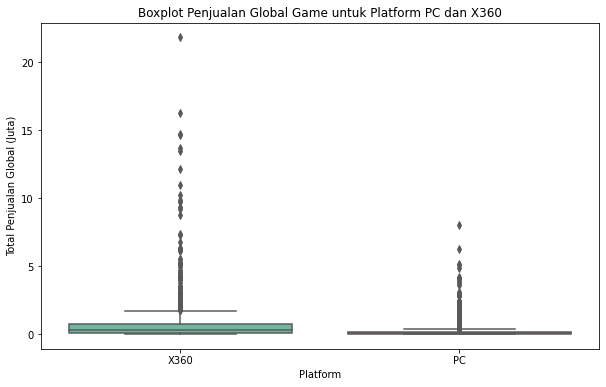

In [27]:
# Filter data untuk platform PC dan X360
platforms = ['PC', 'X360']
filtered_data = game[game['platform'].isin(platforms)]

# Buat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=filtered_data, palette='Set2')
plt.title('Boxplot Penjualan Global Game untuk Platform PC dan X360')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan Global (Juta)')
plt.show()

Dari boxplot, terlihat bahwa, X360 mempunyai total penjualan `1 Juta USD)` yang lebih besar dari PC `(500 ribu USD)`.

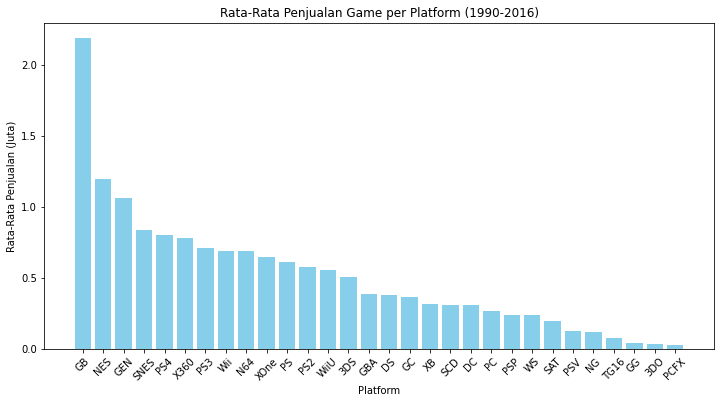

In [28]:
# Filter data hanya untuk tahun 1990-2016
filtered_data = game[(game['year_of_release'] >= 1990) & (game['year_of_release'] <= 2016)]

# Kelompokkan data berdasarkan platform dan hitung rata-rata penjualan
platform_avg_sales = filtered_data.groupby('platform')['total_sales'].mean().reset_index()

# Urutkan platform berdasarkan rata-rata penjualan
platform_avg_sales = platform_avg_sales.sort_values(by='total_sales', ascending=False)

# Buat bar plot untuk menampilkan rata-rata penjualan per platform
plt.figure(figsize=(12, 6))
plt.bar(platform_avg_sales['platform'], platform_avg_sales['total_sales'], color='skyblue')
plt.title('Rata-Rata Penjualan Game per Platform (1990-2016)')
plt.xlabel('Platform')
plt.ylabel('Rata-Rata Penjualan (Juta)')
plt.xticks(rotation=45)
plt.show()

Dari rata-rata penjualan, terdapat perbedaan yang signifikan dengan data pada box plot. Karena total penjualan rata-rata ini dihitung secara jumlah keseluruhan, jadi pasti ada perbedaan.

Korelasi antara Ulasan Pengguna (PC) dan Penjualan: 0.00
Korelasi antara Ulasan Kritikus (PC) dan Penjualan: 0.26


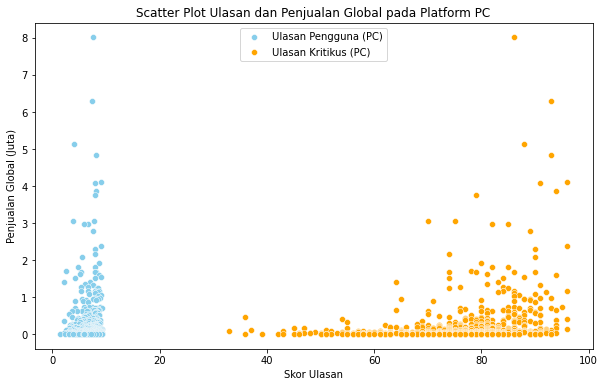

In [29]:
# Filter data hanya untuk platform PC dan data dengan ulasan tidak kosong
platform_selected = 'PC'
filtered_data = game[(game['platform'] == platform_selected) & 
                     (game['user_score'] != 'nan') &  # Filter nilai "nan"
                     (game['user_score'].notnull()) & 
                     (game['critic_score'].notnull())].copy()  # Buat salinan DataFrame

# Ubah tipe data kolom 'user_score' dari string ke float
filtered_data['user_score'] = filtered_data['user_score'].astype(float)

# Buat scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot untuk PC
sns.scatterplot(x='user_score', y='total_sales', data=filtered_data, 
                color='skyblue', label='Ulasan Pengguna (PC)')
sns.scatterplot(x='critic_score', y='total_sales', data=filtered_data, 
                color='orange', label='Ulasan Kritikus (PC)')

plt.title(f'Scatter Plot Ulasan dan Penjualan Global pada Platform {platform_selected}')
plt.xlabel('Skor Ulasan')
plt.ylabel('Penjualan Global (Juta)')
plt.legend()

# Hitung korelasi antara ulasan dan penjualan
correlation_user_pc = filtered_data['user_score'].corr(filtered_data['total_sales'])
correlation_critic_pc = filtered_data['critic_score'].corr(filtered_data['total_sales'])

print(f"Korelasi antara Ulasan Pengguna (PC) dan Penjualan: {correlation_user_pc:.2f}")
print(f"Korelasi antara Ulasan Kritikus (PC) dan Penjualan: {correlation_critic_pc:.2f}")

plt.show()

Dari hasil korelasi kita dapatkan bahwa:


1. Korelasi antara Ulasan Pengguna (PC) dan Penjualan: Sangat lemah, hampir tidak ada hubungan.
2. Korelasi antara Ulasan Kritikus (PC) dan Penjualan: Lebih signifikan, tetapi tetap lemah; ulasan kritikus yang lebih positif berkaitan dengan penjualan yang sedikit lebih tinggi.

Pada scatter plot juga kita ketahui dari skor ulasan pengguna sendiri, nilainya sangat rendah, dan dari kritikus yang memberi nilai positif sangat banyak dengan distribusi terbanyak di range `80-90`.


Selanjutnya, kita cek korelasi untuk platform `X360`.

Korelasi antara Ulasan Pengguna (X360) dan Penjualan: 0.11
Korelasi antara Ulasan Kritikus (X360) dan Penjualan: 0.39


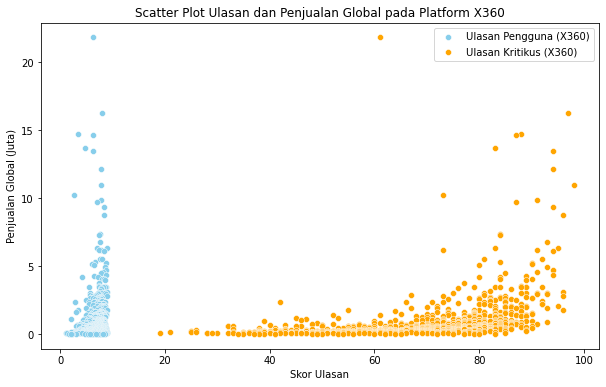

In [30]:
# Filter data hanya untuk platform X360 dan data dengan ulasan tidak kosong
platform_selected = 'X360'
filtered_data_x360 = game[(game['platform'] == platform_selected) & 
                     (game['user_score'] != 'nan') &  # Filter nilai "nan"
                     (game['user_score'].notnull()) & 
                     (game['critic_score'].notnull())].copy()  # Buat salinan DataFrame

# Ubah tipe data kolom 'user_score' dari string ke float
filtered_data_x360['user_score'] = filtered_data_x360['user_score'].astype(float)

# Buat scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot untuk X360
sns.scatterplot(x='user_score', y='total_sales', data=filtered_data_x360, 
                color='skyblue', label='Ulasan Pengguna (X360)')
sns.scatterplot(x='critic_score', y='total_sales', data=filtered_data_x360, 
                color='orange', label='Ulasan Kritikus (X360)')

plt.title(f'Scatter Plot Ulasan dan Penjualan Global pada Platform {platform_selected}')
plt.xlabel('Skor Ulasan')
plt.ylabel('Penjualan Global (Juta)')
plt.legend()

# Hitung korelasi antara ulasan dan penjualan
correlation_user_x360 = filtered_data_x360['user_score'].corr(filtered_data_x360['total_sales'])
correlation_critic_x360 = filtered_data_x360['critic_score'].corr(filtered_data_x360['total_sales'])

print(f"Korelasi antara Ulasan Pengguna (X360) dan Penjualan: {correlation_user_x360:.2f}")
print(f"Korelasi antara Ulasan Kritikus (X360) dan Penjualan: {correlation_critic_x360:.2f}")

plt.show()

Dari hasil korelasi sebagai berikut:


1. Korelasi antara Ulasan Pengguna (X360) dan Penjualan: Lemah (0.11)

Hubungan antara ulasan pengguna dan penjualan pada platform X360 memiliki dampak yang sangat terbatas. Korelasinya lemah.


2. Korelasi antara Ulasan Kritikus (X360) dan Penjualan: Lebih signifikan (0.39)

Hubungan antara ulasan kritikus dan penjualan pada platform X360 lebih kuat daripada ulasan pengguna, meskipun tetap lemah. Ulasan kritikus memiliki pengaruh yang sedikit lebih besar terhadap penjualan.

Dari scatter plot terlihat range ulasan positif dari kritikus, ada pada skor `65 -85`, artinya review ulasan lebih banyak daripada PC.

### Perbandingan Game dengan Platform Lain

Kita akan mengecek terlebih dahulu, game apa yang paling banyak dimainkan pada semua platform. Untuk melakukan perbandingan ke semua platform.

In [31]:
# Menghitung total penjualan global untuk setiap game
game['total_sales'] = game['na_sales'] + game['eu_sales'] + game['jp_sales'] + game['other_sales']

# Mengelompokkan data berdasarkan nama game dan mengambil total penjualan maksimum
most_played_games = game.groupby('name')['total_sales'].sum().reset_index()

# Mengurutkan game berdasarkan total penjualan tertinggi
most_played_games = most_played_games.sort_values(by='total_sales', ascending=False)

# Menampilkan game yang paling banyak dimainkan di semua platform
most_played_game = most_played_games.iloc[0]  # Mengambil game dengan penjualan tertinggi
print(f"Game yang paling banyak dimainkan di antara semua platform adalah: {most_played_game['name']} dengan total penjualan {most_played_game['total_sales']} juta unit.")

Game yang paling banyak dimainkan di antara semua platform adalah: Wii Sports dengan total penjualan 82.53999999999999 juta unit.


Sekarang kita tahu, bahwa game yang paling banyak di mainkan di antara semua platform adalah `Wii Sports`. Kita bandingkan penjualannya dengan `PC`.

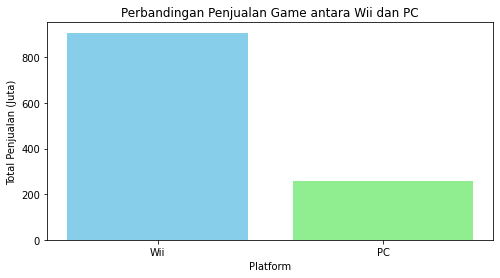

Total Penjualan Game di Platform Wii: 907.51 juta unit
Total Penjualan Game di Platform PC: 259.52000000000004 juta unit


In [32]:
# Filter data hanya untuk platform Wii
wii_sales = game[game['platform'] == 'Wii']

# Filter data hanya untuk platform PC
pc_sales = game[game['platform'] == 'PC']

# Menghitung total penjualan global untuk masing-masing platform
total_wii_sales = wii_sales['total_sales'].sum()
total_pc_sales = pc_sales['total_sales'].sum()

# Membuat grafik perbandingan penjualan antara platform Wii dan PC
platforms = ['Wii', 'PC']
total_sales = [total_wii_sales, total_pc_sales]

plt.figure(figsize=(8, 4))
plt.bar(platforms, total_sales, color=['skyblue', 'lightgreen'])
plt.xlabel('Platform')
plt.ylabel('Total Penjualan (Juta)')
plt.title('Perbandingan Penjualan Game antara Wii dan PC')
plt.show()

# Menampilkan total penjualan untuk kedua platform
print(f"Total Penjualan Game di Platform Wii: {total_wii_sales} juta unit")
print(f"Total Penjualan Game di Platform PC: {total_pc_sales} juta unit")

Total penjualan `Wii` lebih besar daripada `PC`. Kita lanjutkan bandingkan `Wii` dengan `X360`.

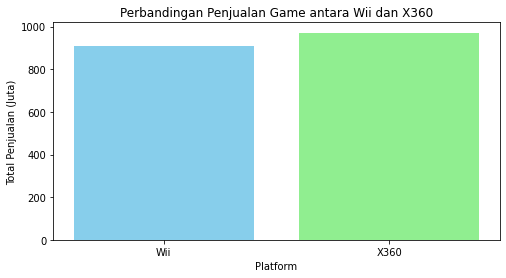

Total Penjualan Game di Platform Wii: 907.51 juta unit
Total Penjualan Game di Platform X360: 971.4200000000001 juta unit


In [33]:
# Filter data hanya untuk platform Wii
wii_sales = game[game['platform'] == 'Wii']

# Filter data hanya untuk platform X360 (Xbox 360)
x360_sales = game[game['platform'] == 'X360']

# Menghitung total penjualan global untuk masing-masing platform
total_wii_sales = wii_sales['total_sales'].sum()
total_x360_sales = x360_sales['total_sales'].sum()

# Membuat grafik perbandingan penjualan antara platform Wii dan X360
platforms = ['Wii', 'X360']
total_sales = [total_wii_sales, total_x360_sales]

plt.figure(figsize=(8, 4))
plt.bar(platforms, total_sales, color=['skyblue', 'lightgreen'])
plt.xlabel('Platform')
plt.ylabel('Total Penjualan (Juta)')
plt.title('Perbandingan Penjualan Game antara Wii dan X360')
plt.show()

# Menampilkan total penjualan untuk kedua platform
print(f"Total Penjualan Game di Platform Wii: {total_wii_sales} juta unit")
print(f"Total Penjualan Game di Platform X360: {total_x360_sales} juta unit")

Penjualan pada `X360` lebih besar daripada `Wii`.

Kesimpulan sementara dari analisa didapat bahwa:
  

1. Total penjualan pada platform dengan pertumbuhan tertinggi adalah `X360` dengan `PC`.
2. Total penjualan pada platform dengan pertumbuhan yang menyusut adalah `PS2`.
3. Game yang banyak terjual terdapat di platform `Wii`.
4. Hasil perbandingan total penjualan game antara `X360`,`Wii`, dan `PC`, tertinggi adalah `X360`.

### Cek Distribusi Genre Game

Genre yang paling menguntungkan adalah 'Action' dengan total penjualan 1744.1699999999694 juta unit.


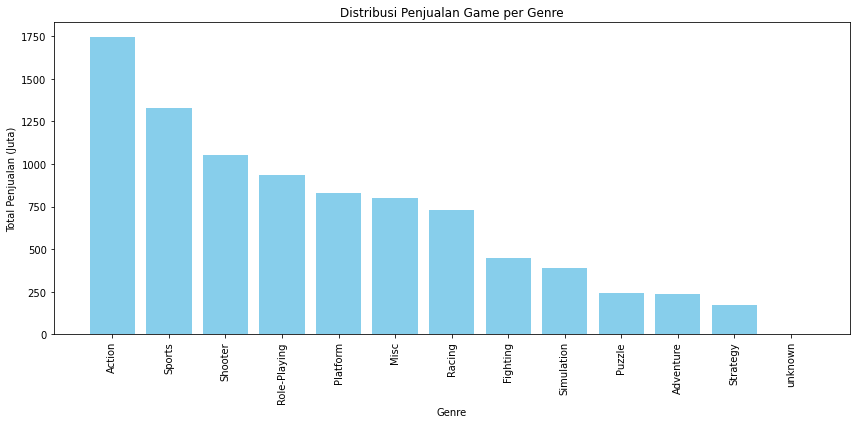

In [34]:
# Mengelompokkan data berdasarkan genre dan menghitung total penjualan global per genre
genre_sales = game.groupby('genre')['total_sales'].sum().reset_index()

# Mengurutkan genre berdasarkan total penjualan tertinggi
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

# Membuat grafik distribusi penjualan per genre
plt.figure(figsize=(12, 6))
plt.bar(genre_sales['genre'], genre_sales['total_sales'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Total Penjualan (Juta)')
plt.title('Distribusi Penjualan Game per Genre')
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan genre yang paling menguntungkan
most_profitable_genre = genre_sales.iloc[0]  # Genre dengan total penjualan tertinggi
print(f"Genre yang paling menguntungkan adalah '{most_profitable_genre['genre']}' dengan total penjualan {most_profitable_genre['total_sales']} juta unit.")

Dari grafik kita ketahui bahwa distribusi genre game yang paling menguntungkan adalah genre `Action`. Kita akan lanjutkan mengecek perbandingan pernjualan yang tinggi dan rendah.

In [35]:
# Mengelompokkan data berdasarkan genre dan menghitung total penjualan global per genre
genre_sales = game.groupby('genre')['total_sales'].sum().reset_index()

# Mengurutkan genre berdasarkan total penjualan tertinggi
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

# Menentukan batas untuk genre dengan penjualan tinggi dan rendah
tinggi_threshold = genre_sales['total_sales'].quantile(0.75)
rendah_threshold = genre_sales['total_sales'].quantile(0.25)

# Memisahkan genre menjadi dua kategori: tinggi dan rendah
genre_sales['kategori'] = pd.cut(genre_sales['total_sales'], bins=[0, rendah_threshold, float('inf')],
                                  labels=['Rendah', 'Tinggi'])

# Menampilkan genre berdasarkan kategori penjualan
genre_by_category = genre_sales.groupby('kategori')['genre'].unique()
print("Genre dengan Penjualan Rendah:", genre_by_category['Rendah'])
print("Genre dengan Penjualan Tinggi:", genre_by_category['Tinggi'])

Genre dengan Penjualan Rendah: ['Puzzle' 'Adventure' 'Strategy' 'unknown']
Genre dengan Penjualan Tinggi: ['Action' 'Sports' 'Shooter' 'Role-Playing' 'Platform' 'Misc' 'Racing'
 'Fighting' 'Simulation']


Disini kita ketahui bahwa, penjualan genre tertinggi adalah `Action`, dan penjualan terendah adalah `Strategy`. Untuk `unknown` dapat kita abaikan.

### Pemrofilan Pengguna untuk Masing - Masing Wilayah

#### Cek 5 Platform Teratas di Masing - Masing Wilayah

In [36]:
# Mengelompokkan data berdasarkan platform dan menghitung total penjualan per wilayah
na_sales = game.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
eu_sales = game.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
jp_sales = game.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

# Mengambil 5 platform teratas untuk masing-masing wilayah
top_na_platforms = na_sales.head(5)
top_eu_platforms = eu_sales.head(5)
top_jp_platforms = jp_sales.head(5)

# Menampilkan hasil
print("5 Platform Teratas di Wilayah NA:")
print(top_na_platforms)
print("\n5 Platform Teratas di Wilayah EU:")
print(top_eu_platforms)
print("\n5 Platform Teratas di Wilayah JP:")
print(top_jp_platforms)

5 Platform Teratas di Wilayah NA:
   platform  na_sales
28     X360    602.47
16      PS2    583.84
26      Wii    496.90
17      PS3    393.49
4        DS    382.40

5 Platform Teratas di Wilayah EU:
   platform  eu_sales
16      PS2    339.29
17      PS3    330.29
28     X360    270.76
26      Wii    262.21
15       PS    213.61

5 Platform Teratas di Wilayah JP:
   platform  jp_sales
4        DS    175.57
15       PS    139.82
16      PS2    139.20
23     SNES    116.55
2       3DS    100.67


Sekarang kita mengetahui bahwa platform teratas untuk wilayah `NA` adalah `X360`, wilayah `EU` adalah `PS2`, wilayah `JP` adalah `DS`.

#### Cek 5 genre teratas di Masing - Masing Wilayah

Selanjutnya kita cek 5 genre teratas untuk masing - masing wilayah.

In [37]:
# Mengelompokkan data berdasarkan genre dan menghitung total penjualan per genre di NA
na_genre_sales = game.groupby('genre')['na_sales'].sum().reset_index()
top_na_genre = na_genre_sales.sort_values(by='na_sales', ascending=False).head(5)

# Mengelompokkan data berdasarkan genre dan menghitung total penjualan per genre di EU
eu_genre_sales = game.groupby('genre')['eu_sales'].sum().reset_index()
top_eu_genre = eu_genre_sales.sort_values(by='eu_sales', ascending=False).head(5)

# Mengelompokkan data berdasarkan genre dan menghitung total penjualan per genre di JP
jp_genre_sales = game.groupby('genre')['jp_sales'].sum().reset_index()
top_jp_genre = jp_genre_sales.sort_values(by='jp_sales', ascending=False).head(5)

# Menampilkan hasil
print("5 Genre Teratas di Wilayah NA:")
print(top_na_genre)

print("\n5 Genre Teratas di Wilayah EU:")
print(top_eu_genre)

print("\n5 Genre Teratas di Wilayah JP:")
print(top_jp_genre)

5 Genre Teratas di Wilayah NA:
       genre  na_sales
0     Action    879.01
10    Sports    684.43
8    Shooter    592.24
4   Platform    445.50
3       Misc    407.27

5 Genre Teratas di Wilayah EU:
      genre  eu_sales
0    Action    519.13
10   Sports    376.79
8   Shooter    317.34
6    Racing    236.51
3      Misc    212.74

5 Genre Teratas di Wilayah JP:
           genre  jp_sales
7   Role-Playing    355.41
0         Action    161.43
10        Sports    135.54
4       Platform    130.83
3           Misc    108.11


Dari data di atas, kita ketahui bahwa untuk wilayah `NA` dan `EU` mempunyai 5 genre teratas yang sama. Dan untuk wilayah `JP` untuk genre `Action` berada di posisi 2. Namun, secara keseluruhan, genre `Action` adalah yang tertinggi.

Dan perbedaan dari masing - masing genre adalah:

1. **Action**: Genre aksi dengan penjualan tertinggi, termasuk game-game seperti Grand Theft Auto dan Assassin's Creed.

2. **Sports**: Genre olahraga seperti FIFA dan NBA 2K, pilihan utama bagi penggemar olahraga.

3. **Shooter**: Genre tembak-menembak seperti Call of Duty dan Battlefield, dengan pangsa pasar besar.

4. **RPG (Role-Playing)**: Genre peran dengan game seperti Final Fantasy dan Skyrim yang memiliki basis penggemar kuat.

5. **Platform**: Genre platform dengan game seperti Super Mario dan Sonic the Hedgehog yang menjadi favorit pemain.

Dengan kata lain, perbedaan utama adalah dalam jenis permainan yang ditawarkan oleh masing-masing genre.

#### Cek Pengaruh Rating ESRB dengan Penjualan di Masing - Masing Wilayah

Kita akan mengecek pengaruh ESRB dengan penjualan masing-masing wilayah, apakah benar ada pengaruh atau tidak. Dan kita akan mengkonversi kolom rating dari tipe data string ke data numerik, agar bisa dihitung korelasinya.

In [42]:
# Mengonversi kolom 'rating' ke tipe data numerik
game['rating'] = game['rating'].astype('category').cat.codes

# Fungsi untuk menghitung korelasi antara rating dan penjualan di wilayah tertentu
def calculate_correlation(region):
    correlation = game[region].corr(game['rating'], method='pearson')
    return correlation

# Menghitung korelasi untuk masing-masing wilayah
correlation_na = calculate_correlation('na_sales')
correlation_eu = calculate_correlation('eu_sales')
correlation_jp = calculate_correlation('jp_sales')

# Menampilkan hasil korelasi
print(f'Korelasi antara Rating ESRB dan Penjualan di Wilayah NA: {correlation_na}')
print(f'Korelasi antara Rating ESRB dan Penjualan di Wilayah EU: {correlation_eu}')
print(f'Korelasi antara Rating ESRB dan Penjualan di Wilayah JP: {correlation_jp}')

Korelasi antara Rating ESRB dan Penjualan di Wilayah NA: -0.06370752239091229
Korelasi antara Rating ESRB dan Penjualan di Wilayah EU: -0.0633389262427706
Korelasi antara Rating ESRB dan Penjualan di Wilayah JP: 0.09463074164788683


**Hasil korelasi antara Rating ESRB dan Penjualan di berbagai wilayah dapat disimpulkan sebagai berikut:**

1. **Wilayah NA**: Korelasi negatif yang mendekati nol `(-0.0637)` menunjukkan hubungan yang sangat lemah atau bahkan tidak ada hubungan antara Rating ESRB dan penjualan di Wilayah NA.

2. **Wilayah EU**: Korelasi negatif yang mendekati nol `(-0.0633)` juga menunjukkan bahwa tidak ada hubungan yang kuat antara Rating ESRB dan penjualan di Wilayah EU.

3. **Wilayah JP**: Korelasi positif yang lemah `(0.0946)` menunjukkan adanya hubungan yang lemah antara Rating ESRB dan penjualan di Wilayah JP. Meskipun hubungannya lemah, peringkat ESRB mungkin memiliki sedikit pengaruh positif terhadap penjualan game di Wilayah JP.

Secara umum, korelasi antara Rating ESRB dan penjualan game di ketiga wilayah tersebut sangat lemah, menunjukkan bahwa faktor-faktor lain seperti gameplay, promosi, atau popularitas mungkin lebih memengaruhi penjualan game daripada peringkat ESRB di wilayah-wilayah tersebut.

### Menguji Hipotesis

#### Pengujian Hipotesis 1: Rata-rata Rating Pengguna Platform Xbox One dan PC adalah sama

Kita akan melanjutkan hipotesis `Rata-rata Rating Pengguna Platform Xbox One dan PC adalah sama`. Dan kita dapat rangkum sebagai berikut:

1. **Hipotesis Nol**: `Rata-rata Rating Pengguna Platform Xbox One dan PC adalah sama`.
2. **Hipotesis Alternatif**: `Rata-rata Rating Pengguna Platform Xbox One dan PC adalah berbeda`.

Mari kita uji menggunakan library scipy.

In [58]:
import pandas as pd
import numpy as np
from scipy import stats

# Filter data untuk Xbox One
xbox_one_data = game[game['platform'] == 'XOne']['user_score']

# Filter data untuk PC
pc_data = game[game['platform'] == 'PC']['user_score']

# Konversi user_score ke bentuk numerik dan ubah 'tbd' menjadi NaN
xbox_one_data = pd.to_numeric(xbox_one_data, errors='coerce')
pc_data = pd.to_numeric(pc_data, errors='coerce')

# Hapus nilai NaN dari kedua kelompok data
xbox_one_data = xbox_one_data.dropna()
pc_data = pc_data.dropna()

# Melakukan uji t-test independent
t_statistic, p_value = stats.ttest_ind(xbox_one_data, pc_data, equal_var=False)

# Menentukan tingkat signifikansi (alpha)
alpha = 0.05

# Menampilkan hasil uji
print("Hasil Uji Statistik:")
print(f"t-statistic = {t_statistic}")
print(f"P-value = {p_value}")

# Menguji hipotesis dengan asumsi alpha
if p_value < alpha:
    print("Hipotesis Nol Ditolak: Rata-rata Rating Pengguna Platform Xbox One dan PC adalah berbeda.")
else:
    print("Hipotesis Nol Tidak Ditolak: Rata-rata Rating Pengguna Platform Xbox One dan PC adalah sama.")

Hasil Uji Statistik:
t-statistic = -4.653422798410772
P-value = 4.935072360183565e-06
Hipotesis Nol Ditolak: Rata-rata Rating Pengguna Platform Xbox One dan PC adalah berbeda.


Dari hasil hipotesis, terlihat bahwa `Hipotesis Nol Ditolak` maka kita mendapatkan hasil bahwa `Rata-rata Rating Pengguna Platform Xbox One dan PC adalah berbeda`. Maka, Hipotesis 1 ini Tidak terbukti.

#### Pengujian Hipotesis 2: Rata-rata Rating Pengguna Genre Action dan Sports berbeda.

Kita akan melanjutkan hipotesis `Rata-rata Rating Pengguna Genre Action dan Sports berbeda`. Dan kita dapat rangkum sebagai berikut:

1. **Hipotesis Nol**: `Rata-rata Rating Pengguna Genre Action dan Sports berbeda`.
2. **Hipotesis Alternatif**: `Rata-rata Rating Pengguna Genre Action dan Sports sama`.

In [59]:
import pandas as pd
import numpy as np
from scipy import stats

# Filter data untuk genre Action
action_data = game[game['genre'] == 'Action']['user_score']

# Filter data untuk genre Sports
sports_data = game[game['genre'] == 'Sports']['user_score']

# Konversi user_score ke bentuk numerik dan ubah 'tbd' menjadi NaN
action_data = pd.to_numeric(action_data, errors='coerce')
sports_data = pd.to_numeric(sports_data, errors='coerce')

# Hapus nilai NaN dari kedua kelompok data
action_data = action_data.dropna()
sports_data = sports_data.dropna()

# Melakukan uji t-test independent
t_statistic, p_value = stats.ttest_ind(action_data, sports_data, equal_var=False)

# Menentukan tingkat signifikansi (alpha)
alpha = 0.05

# Menampilkan hasil uji
print("Hasil Uji Statistik:")
print(f"t-statistic = {t_statistic}")
print(f"P-value = {p_value}")

# Menguji hipotesis dengan asumsi alpha
if p_value < alpha:
    print("Hipotesis Nol Ditolak: Rata-rata Rating Pengguna Genre Action dan Sports sama.")
else:
    print("Hipotesis Nol Tidak Ditolak: Rata-rata Rating Pengguna Genre Action dan Sports berbeda.")

Hasil Uji Statistik:
t-statistic = 1.57746791633354
P-value = 0.11483818791498286
Hipotesis Nol Tidak Ditolak: Rata-rata Rating Pengguna Genre Action dan Sports berbeda.


Dari hipotesis, terlihat bahwa ` Hipotesis Nol Tidak Ditolak`, dimana artinya `Rata-rata Rating Pengguna Platform Xbox One dan PC adalah berbeda`. Maka, Hipotesis 2, Terbukti.

### Kesimpulan Umum

Dalam analisis data yang telah dilakukan, terdapat rangkuman sebagai berikut:

1. **Korelasi Penjualan dengan Ulasan Pengguna dan Kritikus**: Terdapat korelasi yang rendah antara penjualan game dengan ulasan pengguna dan kritikus di berbagai platform. Artinya, ulasan pengguna dan kritikus tidak selalu menjadi faktor utama dalam menentukan penjualan game.

2. **Perbandingan Penjualan antara Platform**: Penjualan game bervariasi di antara platform-platform seperti Wii, Xbox 360, dan PC. Platform Xbox 360 memiliki korelasi yang lebih tinggi dengan ulasan kritikus dibandingkan ulasan pengguna, sementara PC memiliki korelasi yang sangat rendah dengan kedua faktor ulasan tersebut.

3. **Game Terbanyak Dimainkan**: Game yang paling banyak dimainkan di semua platform adalah "Wii Sports." Namun, perlu diingat bahwa ini mungkin juga dipengaruhi oleh fakta bahwa "Wii Sports" adalah permainan bawaan yang disertakan dengan konsol Wii.

4. **Pengaruh Genre terhadap Penjualan**: Genre game "Action," "Sports," dan "Shooter" adalah genre-genre dengan total penjualan tertinggi. Hal ini menunjukkan bahwa game dalam genre-genre ini memiliki pangsa pasar yang besar.

5. **Pengaruh Rating ESRB terhadap Penjualan**: Tidak terdapat korelasi yang signifikan antara rating ESRB (Entertainment Software Rating Board) dan penjualan game di wilayah Amerika Utara (NA) dan Eropa (EU). Namun, di wilayah Jepang (JP), terdapat korelasi positif yang lemah antara rating ESRB dan penjualan.

6. **Pengujian Hipotesis (Platform)**: Pengujian hipotesis menunjukkan bahwa terdapat perbedaan yang signifikan dalam rata-rata rating pengguna antara platform Xbox One dan PC, dengan Xbox One memiliki rata-rata rating yang lebih tinggi.

7. **Pengujian Hipotesis (Genre)**: Pengujian hipotesis menunjukkan bahwa rata-rata rating pengguna untuk genre "Action" dan "Sports" berbeda secara signifikan.

Secara keseluruhan, dalam industri game, penjualan dan popularitas game dapat dipengaruhi oleh berbagai faktor seperti platform, genre, dan ulasan. Namun, tidak selalu ada korelasi yang kuat antara faktor-faktor ini dengan penjualan, dan banyak faktor lain seperti pemasaran, gameplay, dan merek juga memainkan peran penting dalam kesuksesan game.

**`Kesimpulan:`**

Untuk memaksimalkan keuntungan, maka dapat mengoptimalkan untuk menjual game dengan genre **`Action`, `Sports`, `Shooter`**, dan fokus kepada game yang berjalan pada platform seperti **`Xbox 360`, `Xbox One`, `PC`**.